In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/vaibh/Downloads/placement (1).csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [3]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [5]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [6]:
df['cgpa'].skew()

-0.014529938929314918

C:\Users\vaibh\AppData\Local\Temp\ipykernel_12756\239583054.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\vaibh\AppData\Local\Temp\ipykernel_12756\239583054.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

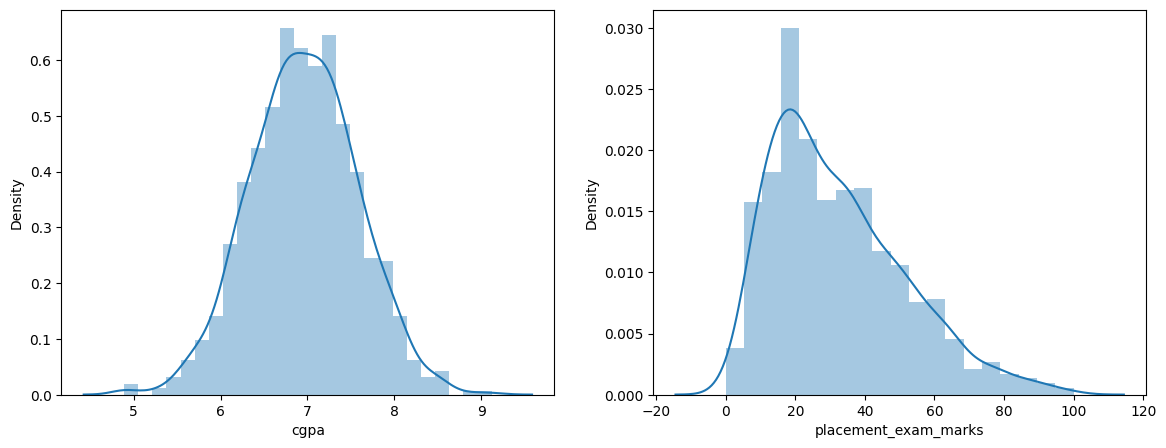

In [7]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])

In [8]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [9]:
# find Iqr (iqr=q3 - q1)
# upperlimit=75thpercentile(q3) + 1.5(Iqr)
# lowerlimit=25ththpercentile(q1) - 1.5(iqr)

In [10]:
percentile75th=df['placement_exam_marks'].quantile(.75)
percentile25th=df['placement_exam_marks'].quantile(.25)

In [11]:
percentile25th

17.0

In [12]:
percentile75th

44.0

In [13]:
IQR=percentile75th - percentile25th 

In [14]:
IQR

27.0

In [15]:
upper_limit=percentile75th + 1.5 * IQR
lower_limit=percentile25th - 1.5 * IQR

In [16]:
upper_limit

84.5

In [17]:
lower_limit

-23.5

In [18]:
# find outlier 


In [19]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [21]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


In [22]:
# remove outlier by  trimming 

new_df=df[df['placement_exam_marks']<upper_limit] 

In [23]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [24]:
# capping  : capping is a techinque where we handle the oulier by the max and min value

In [25]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [26]:
df['placement_exam_marks']=np.where(
    df['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        df['placement_exam_marks']<lower_limit,
        lower_limit,
        df['placement_exam_marks']
    )
    
)

In [27]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\vaibh\AppData\Local\Temp\ipykernel_12756\2541405458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

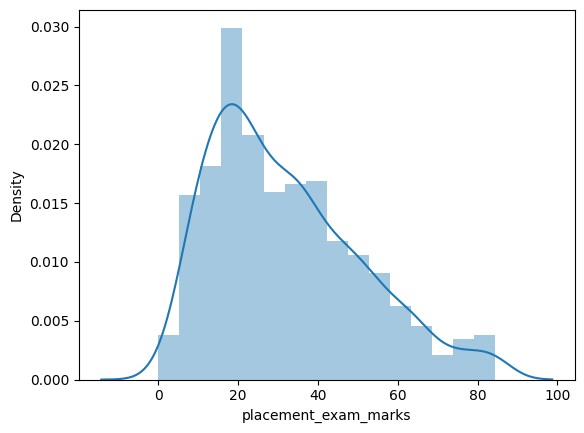

In [29]:
sns.distplot(df['placement_exam_marks'])

<Axes: xlabel='placement_exam_marks'>

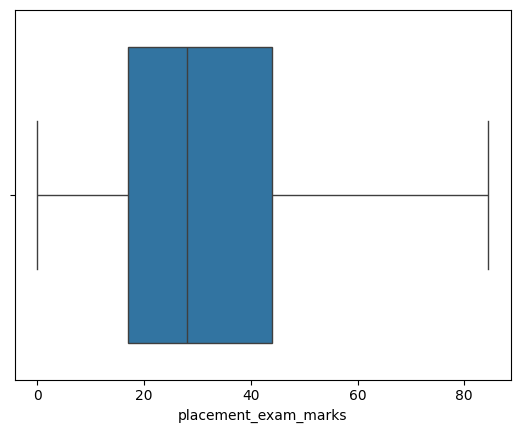

In [36]:
sns.boxplot(x=df['placement_exam_marks'],)